In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
df = pd.read_csv('/Users/sameerkumar/Desktop/SAMEER/Main flow/week-6/titanic/train.csv')

In [17]:
# Display the first few rows of the dataframe
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [18]:
# Display summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [21]:
# Check for missing values again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
# Q(1).Calculate the survival rate


survival_rate = df['Survived'].mean()
print(f'Overall Survival Rate: {survival_rate:.2f}')

Overall Survival Rate: 0.38


In [23]:
# Q(2).Calculate survival rate by class


class_survival_rate = df.groupby('Pclass')['Survived'].mean()
print(class_survival_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [24]:
# Q(3).Calculate survival rate by gender


gender_survival_rate = df.groupby('Sex')['Survived'].mean()
print(gender_survival_rate)

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [25]:
# Q(4).Create age bins and calculate survival rate by age



df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
age_survival_rate = df.groupby('AgeBin')['Survived'].mean()
print(age_survival_rate)

AgeBin
Child          0.579710
Teen           0.381818
Adult          0.364769
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


In [26]:
# Q(5).Create fare bins and calculate survival rate by fare



df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low Fare', 'Mid Fare', 'High Fare', 'Very High Fare'])
fare_survival_rate = df.groupby('FareBin')['Survived'].mean()
print(fare_survival_rate)

FareBin
Low Fare          0.197309
Mid Fare          0.303571
High Fare         0.454955
Very High Fare    0.581081
Name: Survived, dtype: float64


In [27]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

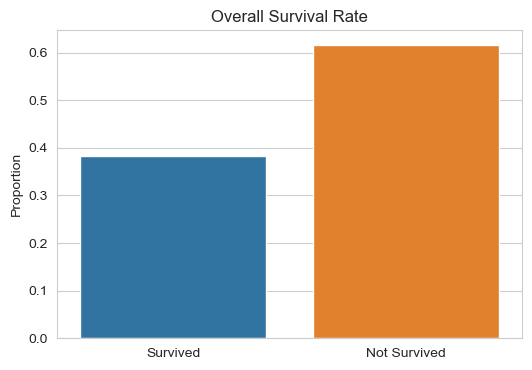

In [28]:
# Overall survival rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Survived', 'Not Survived'], y=[df['Survived'].mean(), 1 - df['Survived'].mean()])
plt.title('Overall Survival Rate')
plt.ylabel('Proportion')
plt.show()

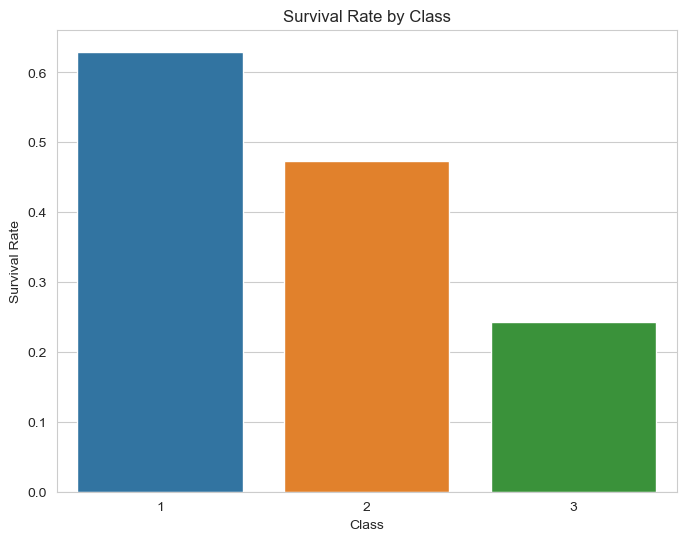

In [29]:
# Survival rate by class
plt.figure(figsize=(8, 6))
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

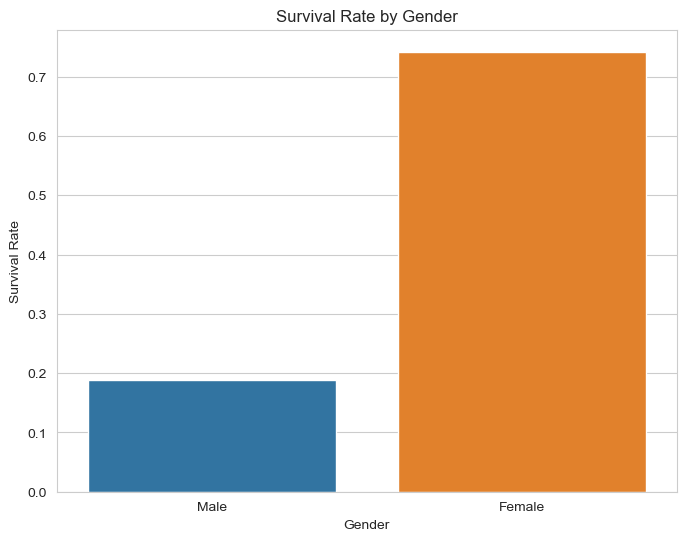

In [30]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=gender_survival_rate.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

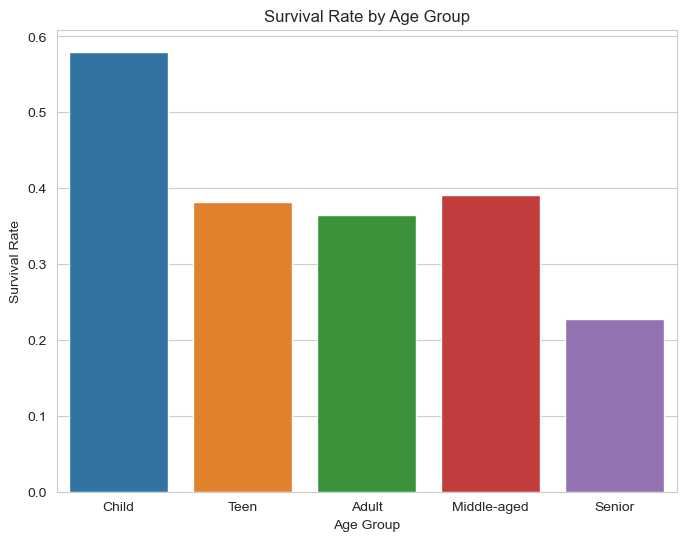

In [31]:
# Survival rate by age
plt.figure(figsize=(8, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

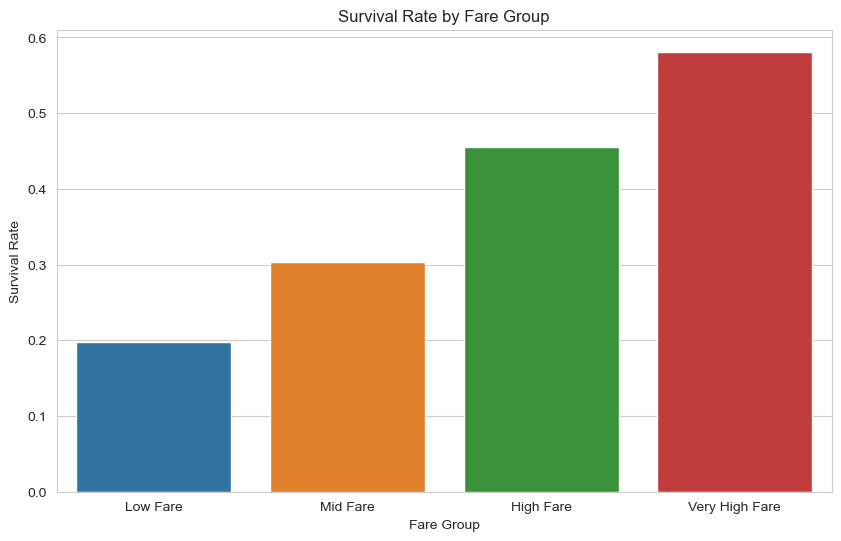

In [32]:
# Survival rate by fare
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_survival_rate.index, y=fare_survival_rate.values)
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()